<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/Computer%20Vision/Flower_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importing Dataset

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-01-24 19:40:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-01-24 19:40:06 (99.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

In [4]:
!pip install tensorflow-datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import tensorflow_datasets as tfds
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

228813984/228813984 [==============================] - 11s 0us/step


In [7]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

## 2. Setting Up Data Loaders

In [6]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dataset = image_dataset_from_directory(data_dir,label_mode = "categorical",image_size = (224,224),validation_split = 0.2,subset = "training",seed = 42)
test_dataset = image_dataset_from_directory(data_dir,label_mode = "categorical",image_size = (224,224),validation_split = 0.2,subset = "validation",seed = 32)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [7]:
class_names = train_dataset.class_names

## 3. Data Augmentation

In [8]:
from tensorflow.keras.layers.experimental import preprocessing
data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal",input_shape=(224, 224, 3)),
    preprocessing.Resizing(224,224),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.Rescaling(1./255),
    
])

## 2. Model 0 Simple Model

In [17]:
checkpoint_path ="model_1_weight_checkpoints/checkpoint.ckpt"
     
checkpoint_call_back = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_path,
    save_weights_only = True,
    save_best_only = True,
    save_freq = "epoch"
)

In [74]:
model_0 = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(
        filters = 10,
        kernel_size = 3,
        strides  = (1,1),
        activation = "relu",name = "input_layer"
        ),
    tf.keras.layers.Conv2D(
        10,3,activation = "relu"
    ),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(
        10,3,activation = "relu"
    ),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(
        10,3,activation = "relu"
    ),
    tf.keras.layers.GlobalMaxPool2D(),
    tf.keras.layers.Dense(len(class_names),activation = "softmax",name = "output_layer"),

])
model_0.compile(loss = "categorical_crossentropy",metrics = ["accuracy"],optimizer = "adam")

In [76]:
history_0 = model_0.fit(
    train_dataset,epochs = 10,
    steps_per_epoch = len(train_dataset),
    validation_data = test_dataset,
    validation_steps = len(test_dataset),
    callbacks = [checkpoint_call_back]
)

Epoch 1/10
92/92 [==============================] - 56s 590ms/step - loss: 1.6080 - accuracy: 0.2197 - val_loss: 1.6107 - val_accuracy: 0.2289
Epoch 2/10
92/92 [==============================] - 53s 572ms/step - loss: 1.6056 - accuracy: 0.2180 - val_loss: 1.6037 - val_accuracy: 0.2207
Epoch 3/10
92/92 [==============================] - 54s 585ms/step - loss: 1.6044 - accuracy: 0.2408 - val_loss: 1.5966 - val_accuracy: 0.2411
Epoch 4/10
92/92 [==============================] - 48s 522ms/step - loss: 1.6037 - accuracy: 0.2408 - val_loss: 1.5911 - val_accuracy: 0.2561
Epoch 5/10
92/92 [==============================] - 49s 526ms/step - loss: 1.6033 - accuracy: 0.2408 - val_loss: 1.5868 - val_accuracy: 0.2643
Epoch 6/10
92/92 [==============================] - 49s 527ms/step - loss: 1.6031 - accuracy: 0.2408 - val_loss: 1.5847 - val_accuracy: 0.2493
Epoch 7/10
92/92 [==============================] - 48s 518ms/step - loss: 1.6028 - accuracy: 0.2408 - val_loss: 1.5962 - val_accuracy: 0.2411

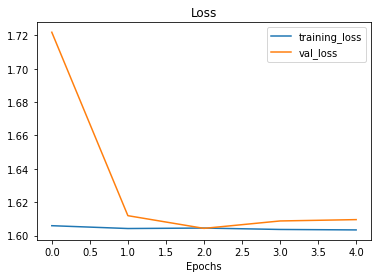

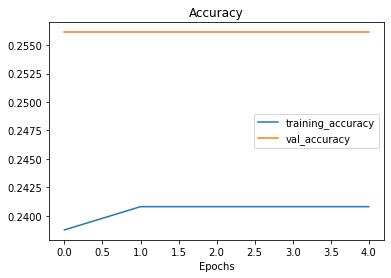

In [75]:
plot_loss_curves(history_0)

## 3. Model 1 Complex Structure

In [20]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 64,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters = 128,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters = 256,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters = 512,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters = 1024,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters = 512,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters = 512,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalMaxPool2D(),
    ## Fully Connected Layer
    tf.keras.layers.Dense(1024,activation = "relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(5,activation = "softmax",name = "output_name")
])
model_1.compile(loss = "categorical_crossentropy",metrics = ["accuracy"],optimizer = "adam")

In [18]:
history_1 = model_1.fit(
    train_dataset,epochs = 10,
    steps_per_epoch = len(train_dataset),
    validation_data = test_dataset,
    validation_steps = len(test_dataset),
    callbacks = [checkpoint_call_back]
)

Epoch 1/10
92/92 [==============================] - 38s 280ms/step - loss: 1.6208 - accuracy: 0.4319 - val_loss: 9.8784 - val_accuracy: 0.2589
Epoch 2/10
92/92 [==============================] - 19s 204ms/step - loss: 1.3371 - accuracy: 0.5181 - val_loss: 1.8535 - val_accuracy: 0.5054
Epoch 3/10
92/92 [==============================] - 19s 204ms/step - loss: 1.1351 - accuracy: 0.5637 - val_loss: 1.1986 - val_accuracy: 0.6417
Epoch 4/10
92/92 [==============================] - 19s 201ms/step - loss: 1.0122 - accuracy: 0.6117 - val_loss: 1.2417 - val_accuracy: 0.5627
Epoch 5/10
92/92 [==============================] - 19s 206ms/step - loss: 0.9278 - accuracy: 0.6563 - val_loss: 0.8394 - val_accuracy: 0.6621
Epoch 6/10
92/92 [==============================] - 19s 201ms/step - loss: 0.8108 - accuracy: 0.7003 - val_loss: 0.8984 - val_accuracy: 0.6499
Epoch 7/10
92/92 [==============================] - 19s 201ms/step - loss: 0.7558 - accuracy: 0.7173 - val_loss: 0.8780 - val_accuracy: 0.6935

In [ ]:
model_1.evaluate(test_dataset)


In [119]:
model_1.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_32 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
 conv2d_180 (Conv2D)         (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_169 (MaxPooli  (None, 112, 112, 64)     0         
 ng2D)                                                           
                                                                 
 batch_normalization_161 (Ba  (None, 112, 112, 64)     256       
 tchNormalization)                                               
                                                                 
 dropout_160 (Dropout)       (None, 112, 112, 64)      0         
                                                                 
 conv2d_181 (Conv2D)         (None, 112, 112, 128)   

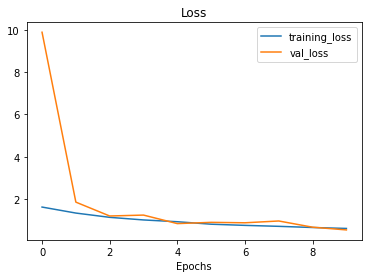

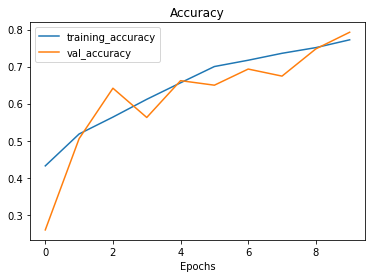

In [21]:
plot_loss_curves(history_1)

## 4. Model 2 : Complex Structure without Dropouts

In [23]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 64,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters = 128,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters = 256,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters = 512,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters = 1024,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters = 512,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters = 512,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GlobalMaxPool2D(),
    ## Fully Connected Layer
    tf.keras.layers.Dense(1024,activation = "relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(5,activation = "softmax",name = "output_name")
])
model_2.compile(loss = "categorical_crossentropy",metrics = ["accuracy"],optimizer = "adam")

In [24]:
history_2 = model_2.fit(
    train_dataset,epochs = 10,
    steps_per_epoch = len(train_dataset),
    validation_data = test_dataset,
    validation_steps = len(test_dataset),
    callbacks = [checkpoint_call_back]
)

Epoch 1/10
92/92 [==============================] - 19s 191ms/step - loss: 1.5303 - accuracy: 0.4595 - val_loss: 35.6071 - val_accuracy: 0.2289
Epoch 2/10
92/92 [==============================] - 18s 190ms/step - loss: 1.1663 - accuracy: 0.5725 - val_loss: 2.8446 - val_accuracy: 0.4877
Epoch 3/10
92/92 [==============================] - 18s 191ms/step - loss: 1.0314 - accuracy: 0.6298 - val_loss: 2.4999 - val_accuracy: 0.4428
Epoch 4/10
92/92 [==============================] - 18s 190ms/step - loss: 0.9206 - accuracy: 0.6533 - val_loss: 0.8488 - val_accuracy: 0.7071
Epoch 5/10
92/92 [==============================] - 18s 189ms/step - loss: 0.8438 - accuracy: 0.6952 - val_loss: 1.0941 - val_accuracy: 0.6335
Epoch 6/10
92/92 [==============================] - 19s 200ms/step - loss: 0.8040 - accuracy: 0.7081 - val_loss: 0.6803 - val_accuracy: 0.7343
Epoch 7/10
92/92 [==============================] - 18s 192ms/step - loss: 0.7009 - accuracy: 0.7343 - val_loss: 0.8376 - val_accuracy: 0.693

In [26]:
model_2.evaluate(test_dataset)

23/23 [==============================] - 2s 60ms/step - loss: 1.5642 - accuracy: 0.5504


[1.5642389059066772, 0.5504087209701538]

## 5. Removing Fully Connected Layers

In [50]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 64,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters = 128,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters = 256,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters = 512,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters = 1024,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters = 512,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters = 512,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalMaxPool2D(),
    ## Fully Connected Layer
    tf.keras.layers.Dense(5,activation = "softmax",name = "output_name")
])
model_3.compile(loss = "categorical_crossentropy",metrics = ["accuracy"],optimizer = "adam")

In [51]:
history_3 = model_3.fit(
    train_dataset,epochs = 20,
    steps_per_epoch = len(train_dataset),
    validation_data = test_dataset,
    validation_steps = len(test_dataset),
    callbacks = [checkpoint_call_back]
)

Epoch 1/20
92/92 [==============================] - 20s 200ms/step - loss: 1.6168 - accuracy: 0.4332 - val_loss: 11.5437 - val_accuracy: 0.2071
Epoch 2/20
92/92 [==============================] - 19s 199ms/step - loss: 1.1598 - accuracy: 0.5497 - val_loss: 1.7723 - val_accuracy: 0.4782
Epoch 3/20
92/92 [==============================] - 19s 202ms/step - loss: 0.9646 - accuracy: 0.6362 - val_loss: 0.8180 - val_accuracy: 0.6812
Epoch 4/20
92/92 [==============================] - 19s 202ms/step - loss: 0.9152 - accuracy: 0.6584 - val_loss: 1.1622 - val_accuracy: 0.5926
Epoch 5/20
92/92 [==============================] - 19s 200ms/step - loss: 0.8494 - accuracy: 0.6754 - val_loss: 0.6391 - val_accuracy: 0.7480
Epoch 6/20
92/92 [==============================] - 19s 201ms/step - loss: 0.7580 - accuracy: 0.7146 - val_loss: 0.6779 - val_accuracy: 0.7534
Epoch 7/20
92/92 [==============================] - 19s 201ms/step - loss: 0.6844 - accuracy: 0.7428 - val_loss: 0.7830 - val_accuracy: 0.730

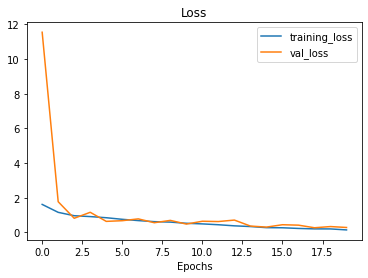

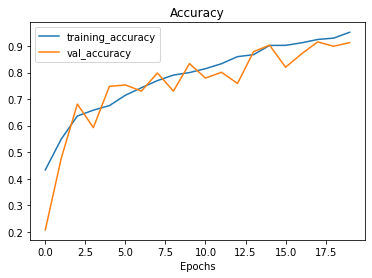

In [52]:
plot_loss_curves(history_3)